# Simulating the Hawk vs. Dove Game

Hawk vs. Dove is a Strategy Game which looks to identify an Evolutionary Stable Strategy (ESS) in a population by evaluating the trade-off between the reward and cost of obtaining food. Hawks symbolise a naturally agressive strategy, whilst Doves represent a more passive approach. 

The game involves two agents (players) who come across a piece of food and must choose a strategy (Hawk or Dove) in order to obtain the food. The chosen strategy, and the strategy of their opponent, determines the payoff that each challenger will obtain from the interaction. Over successive generations and contests, the frequencies of those strategies will change, either resulting in a _Mixed ESS_ or a _Pure ESS_. 

A _Pure ESS_ is a system in which one strategy always out-competes all other strategies, whereas a _Mixed ESS_ is a system in which possible strategies exhibit some frequency in which they are out-performed by another strategy. In a two-strategy _Mixed ESS_ there exists some frequency at which the strategies are in equilibrium, and increasing the frequency of strategy A beyond this point will result in a decrease in strategy A fitness, raising the relative fitness of strategy B.

In the following Jupyter Notebook we will try to identify the point of equilibrium and the Evolutionary Stabel Strategy for a Hawk vs. Dove game. We will also simulate a Hawk vs. Dove game over a number of generations to calculate the optimum frequencies of the two strategies in a stable population.

A video to explain the concept of Hawk Vs. Dove (Thanks to Tim): https://www.youtube.com/watch?v=YNMkADpvO4w

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,6)

## Part 1: Setting up the game

In our simulated Hawk vs. Dove world we must describe a few naturally occuring constants, namely the reward given by the food source $V$, the cost of injury $I$, and the cost of the interaction $C$. These can be changed later, but for the moment let's leave them as they are.

In [ ]:
V = 50 # Reward for food
I = 100 # Cost of injury
C = 10 # Cost for interaction

Remember that in the Hawk vs. Dove game each of the two agents can choose to either act as a Hawk or as a Dove. 

Let's say that "Hawk" is choice 0, and "Dove" is choice 1:

In [ ]:
hawk = 0
dove = 1

Given these possible choices, we can observe the following situations:


* Player 1 chooses Hawk and Player 2 chooses Hawk. Both Hawks enter into a fight. On average, Player 1 will win the food half of the time and succumb to injury the other half of the time.   
 * Both Player 1 and Player 2 both get a reward of $\frac{V-I}{2}$ due to the resulting fight.
 
 
* Player 1 chooses Dove and Player 2 chooses Dove. Both Doves incur the cost of the interaction, but only one player will win the food. 
 * Both Player 1 and Player 2 will get a reward of $\frac{V}{2}-C$ on average.
 
 
* Player 1 chooses Hawk and Player 2 chooses Dove. The Dove runs away, incurring no cost, and the Hawk gets all of the food. 
 * Player 1 will get a reward of $V$ and Player 2 gets 0.
 
 
* Player 1 chooses Dove and Player 2 chooses Hawk. The Dove runs away, incurring no cost, and the Hawk gets all of the food. 
 * Player 1 will get a reward of 0 and Player 2 gets $V$.


This can be described with the following payoff matrix:

|$\frac{\displaystyle\text{Opponent ➤}}{▼ \displaystyle \text{ Player}}$ | Hawk | Dove |
|---:|:---:|:--:|
| **Hawk** | $$\frac{(V-I)}{2}$$ | $$V$$ |
| **Dove** | $$0$$ | $$ \frac{V}{2}-C$$ |


We will describe this payoff matrix for the possible action by creating a 2-Dimensional matrix containing the above rewards.

In [ ]:
action_payoff = np.array([[(V-I)/2, V],
                           [0, V/2-C]])

print("Payoff Matrix for Hawk vs. Dove:")
print(action_payoff)

Payoff Matrix for Hawk vs. Dove:
[[-25.  50.]
 [  0.  15.]]


## Part 2: Selecting actions and obtaining rewards 
In order to identify the reward obtained during a scenario, we will need to _index_ into the payoff matrix depending on the selected actions from each player. 

_Indexing_ is the process of accessing into a specific location. In our case we will be specifying a **row** and **column** based on the chosen pair of actions.

If the player chooses to act like a Hawk, we will have to index into **row 0**. If they choose to act like a Dove then we will index into **row 1**. If the opponent chooses to act like a Hawk then we will index into **column 0**, if they choose to act like a Dove then we will index into **column 1**.

By considering both of the choices we will be able to index into the correct location of our 2-Dimensional payoff matrix. If both players choose Hawk, then we will index into location **(0, 0)** of *action_payoff*, and so on. 

Consider the next cell, in which Player 1 chooses Dove and Player 2 chooses Hawk. Their rewards are then printed:

In [ ]:
player1_choice = dove
player2_choice = hawk

player1_reward = action_payoff[player1_choice, player2_choice]
player2_reward = action_payoff[player2_choice, player1_choice]

print("Player 1's reward: {0}".format(player1_reward))
print("Player 2's reward: {0}".format(player2_reward))

Player 1's reward: 0.0
Player 2's reward: 50.0


We can see that Player 2's aggressive strategy has paid off!

Player two obtained a good reward for choosing Hawk, however Player 1 may see this result and decide to play as a Hawk on the next round:

In [ ]:
player1_choice = hawk
player2_choice = hawk

player1_reward = action_payoff[player1_choice, player2_choice]
player2_reward = action_payoff[player2_choice, player1_choice]

print("Player 1's reward: {0}".format(player1_reward))
print("Player 2's reward: {0}".format(player2_reward))

Player 1's reward: -25.0
Player 2's reward: -25.0


In this situation both players have suffered a loss due to the cost of the fight for food.

Clearly always selecting Hawk is not a good approach...

Both players may then decide to act as a Dove to avoid this penalty:

In [ ]:
player1_choice = dove
player2_choice = dove

player1_reward = action_payoff[player1_choice, player2_choice]
player2_reward = action_payoff[player2_choice, player1_choice]

print("Player 1's reward: {0}".format(player1_reward))
print("Player 2's reward: {0}".format(player2_reward))

Player 1's reward: 15.0
Player 2's reward: 15.0


This works out okay, but we may get a better reward if we had chosen to act as a Hawk!

Clearly being purely Dove or Hawk is not a good approach for the whole population. We will need to find a balanced approach to the strategy we choose. In order to do this we can utilise Game Theory to identify where the optimum balance in strategies is. 

## Part 3: Finding the equilibrium of strategies in a population
In order to find which frequency of each strategy is optimal for the population, we will need to run a **simulation** of the game, identifying a suitable approach which maximises our reward on average.

The first thing we must do is define the frequency of Hawks and Doves in our population. We will initially set this to be a 50:50 ratio of Hawk:Dove, but you can change this later to see the effect.

In [ ]:
hawk_frequency = 0.5
dove_frequency = 1 - hawk_frequency

In order to optimise our approach we need to look at the average payoff, or **fitness**, for choosing to purely select one of the strategies, Hawk or Dove. Fitness describes the reward for a given interaction, and is often used in evolutionary strategies to describe the ability of an individual to pass genes on to the next generation. 

To calculate the average payoff for a strategy, we will need to consider the following equation:

$$\text{AveragePayoff}_{\text{strategy}}=\sum_{c}^{\text{contest}}r(c)\times{}f(c) $$

where $c$ is a given contest in the game, $r(c)$ describes the reward obtained for that contest, and $f(c)$ is the frequency of that contest occuring.

In the case of the Hawk and Dove strategies, this results in the following:

In [ ]:
hawk_average_payoff = action_payoff[hawk, hawk] * hawk_frequency + action_payoff[hawk, dove] * dove_frequency
dove_average_payoff = action_payoff[dove, hawk] * hawk_frequency + action_payoff[dove, dove] * dove_frequency
print('Average Hawk Payoff in a population with {0:.0f}% Hawks: {1}'.format(hawk_frequency*100, hawk_average_payoff))
print('Average Dove Payoff in a population with {0:.0f}% Hawks: {1}'.format(hawk_frequency*100, dove_average_payoff))

Average Hawk Payoff in a population with 50% Hawks: 12.5
Average Dove Payoff in a population with 50% Hawks: 7.5


Using the above, we can see that in a population with 50% Hawks, the Hawk strategy obtains more reward relative to choosing the Dove strategy. 

In order to calculate the fitness and relative fitness in our simulation, we can define the above fitness calculation for our Hawk Vs. Dove game as the following Python functions:

In [ ]:
# Calculate the average payoff for a strategy
def calculate_average_payoff(strategy, action_payoff, strategy_frequencies):
    average_payoff = np.sum(action_payoff[strategy] * strategy_frequencies)
    return average_payoff


# Calculate the relative fitness for a strategy
def calculate_relative_fitness(strategy, action_payoff, strategy_frequencies):
    normalised_action_payoff = (action_payoff - np.min(action_payoff)) / (np.max(action_payoff) - np.min(action_payoff))
    fitness = np.sum(normalised_action_payoff[strategy] * strategy_frequencies)
    return fitness

## Visualise the Average Payoff of each strategy to the frequency of Hawks in the population
Given that our strategy can be anywhere between 0% and 100% of the total population, we can now look at how the average payoff of each strategy compares when one of the other strategies starts to become dominant. To do this we will evaluate our strategy's average payoff at regular possible frequencies between 0 and 1. 

In [ ]:
hawk_frequencies = np.linspace(0, 1)
hawk_strategy_by_frequency = [calculate_average_payoff(hawk, action_payoff, [i, 1-i]) for i in hawk_frequencies]
dove_strategy_by_frequency = [calculate_average_payoff(dove, action_payoff, [i, 1-i]) for i in hawk_frequencies]

We can then plot these relative fitnesses to identify if and where an equilibrium exists within our population. Notice the point at which the following fitness lines cross. 

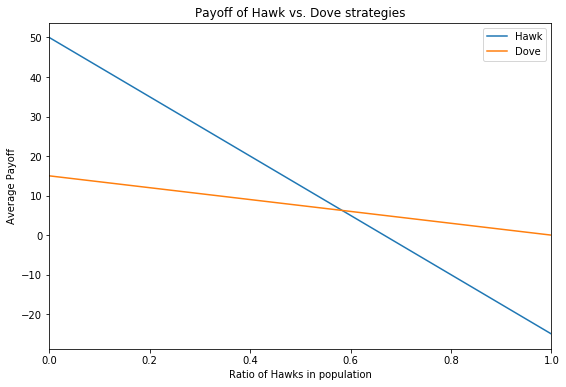

In [ ]:
plt.plot(hawk_frequencies, hawk_strategy_by_frequency)
plt.plot(hawk_frequencies, dove_strategy_by_frequency)

plt.legend(('Hawk', 'Dove'))
plt.xlabel('Ratio of Hawks in population')
plt.ylabel('Average Payoff')
plt.xlim([0, 1])
plt.title('Payoff of Hawk vs. Dove strategies')
plt.show()

## Part 4: Finding the equilibrium point empirically
If we want to identify the equilibrium point, the frequency at which our two strategies in the population have equal fitness, then we can compute the intersection of the two relative fitness lines.

To do this we will want to convert our calculated fitnesses for each frequency into a slope-intercept form for a line:

$$ y_{\text{strategy}} = m_{\text{strategy}}x+c_{\text{strategy}} $$

To calculate the gradient, $m_{strategy}$, we solve

$$ m_{\text{strategy}} = \frac{ \text{Change in } y_{ \text{strategy} } }{\text{Change in x}} $$

and to calculate the intercept, $c_{\text{strategy}}$, we solve for where $x=0$

$$ c_{\text{strategy}} = y_{\text{strategy}} - m_{\text{strategy}} \times{} 0 $$

Given this new slope-intercept form we can calculate the intersection point of the two strategies by finding the point at which the resulting $y$ is the same for both strategies:

$$ m_{\text{hawk}}x+c_{\text{hawk}} = m_{\text{dove}}x+c_{\text{dove}} $$

Solving to find $x$ gives us:

$$\begin{aligned}
m_{\text{hawk}}x+c_{\text{hawk}} &= m_{\text{dove}}x+c_{\text{dove}} \\
m_{\text{hawk}}x+c_{\text{hawk}} -m_{\text{dove}}x &= c_{\text{dove}} \\ 
m_{\text{hawk}}x -m_{\text{dove}}x &= c_{\text{dove}}-c_{\text{hawk}} \\ 
x(m_{\text{hawk}} - m_{\text{dove}}) &= c_{\text{dove}}-c_{\text{hawk}} \\
x &= \frac{c_{\text{dove}} - c_{\text{hawk}}}{m_{\text{hawk}} -m_{\text{dove}}}
\end{aligned}$$


In [ ]:
# calculate slope and intercept of hawk:
m_hawk = (hawk_strategy_by_frequency[-1] - hawk_strategy_by_frequency[0]) / (hawk_frequencies[-1] - hawk_frequencies[0])
c_hawk = hawk_strategy_by_frequency[0] - m_hawk * hawk_frequencies[0]

# calculate slope and intercept of dove:
m_dove = (dove_strategy_by_frequency[-1] - dove_strategy_by_frequency[0]) / (hawk_frequencies[-1] - hawk_frequencies[0])
c_dove = dove_strategy_by_frequency[0] - m_dove * hawk_frequencies[0]

# Calculate intersection point between the two strategies:
x_intersection = (c_dove - c_hawk) / (m_hawk - m_dove)
y_intersection = m_hawk * x_intersection + c_hawk

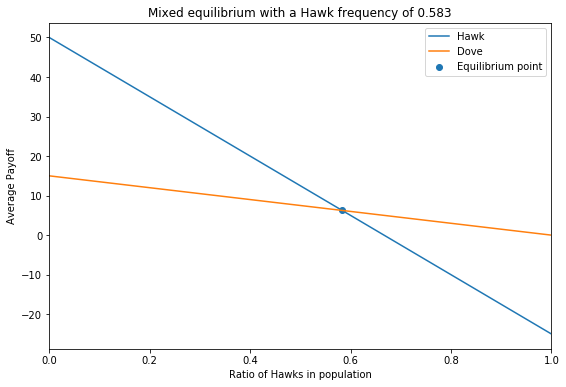

In [ ]:
# Visualise the equilibrium point 
plt.plot(hawk_frequencies, hawk_strategy_by_frequency)
plt.plot(hawk_frequencies, dove_strategy_by_frequency)
plt.scatter(x_intersection, y_intersection)
plt.legend(('Hawk', 'Dove', 'Equilibrium point'))
plt.xlabel('Ratio of Hawks in population')
plt.ylabel('Average Payoff')
plt.xlim([0, 1])
plt.title("Mixed equilibrium with a Hawk frequency of {0:.3f}".format(x_intersection))
plt.show()

## Part 5: Utilising Game Theory to optimise the frequency of strategies within a population
In the above section we can see that there is a point at which an equilibrium of the strategy types is present within the population. We can see that after our equilibrium point if we continue increasing the frequency of Hawks then this results in reduction in fitness below that of Doves. We can also see that increasing the frequency of Doves (or reducing that of Hawks) results in Doves becoming less fit than Hawks. 

This observation means that no matter which direction we move away from the equilibrium, the relative fitness of one of the strategies is lowered, and thus our population moves back towards the equilibrium.

Even though we have calculated the equilibrium point empirically above, we can see that we have to do a lot of work just for a system which contains two possible strategies. In reality we may have numerous possible strategies to choose from, each with their own possible rewards for interactions with other strategies. In order to calculate a population's optimal frequency of strategies we can utilise Game Theory. This will allow us to observe how a population will develop given our payoff matrix and an initial frequency of strategies.

In the following section we will simulate this behaviour. We will first choose a number of generations to evaluate and an initial frequency of Hawks within the population. We will then set up some plots and run our simulation over each generation.

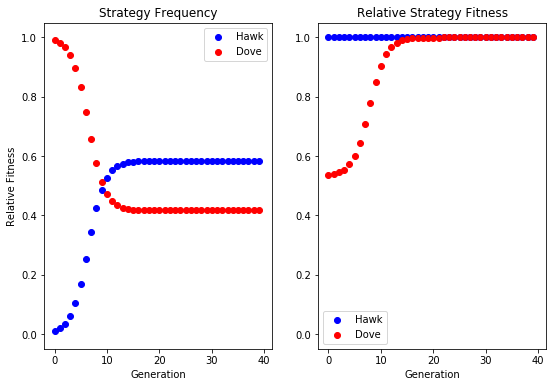

In [ ]:
# Starting Parameters
n_generation = 40
hawk_frequency = 0.01

# Set up plots
plt.figure()

ax1 = plt.subplot(121)
ax1.set_xlabel('Generation')
ax1.set_ylabel('Relative Fitness')
ax1.set_ylim([-0.05,1.05])
ax1.set_title('Strategy Frequency')

ax2 = plt.subplot(122)
ax2.set_xlabel('Generation')
ax2.set_ylim([-0.05,1.05])
ax2.set_title('Relative Strategy Fitness')

# Run simulation over a number of generations to optimise the strategy frequencies
for i_generation in range(0, n_generation):
    
    # Plot current strategy frequencies
    ax1.scatter(i_generation, hawk_frequency, c='b')
    ax1.scatter(i_generation, 1-hawk_frequency, c='r')
    
    # Calculate population fitness
    hawk_fitness = calculate_relative_fitness(hawk, action_payoff, [hawk_frequency, 1-hawk_frequency])
    dove_fitness = calculate_relative_fitness(dove, action_payoff, [hawk_frequency, 1-hawk_frequency]) 
    
    # Calculate relative strategy fitness
    reference_strategy = np.max([hawk_fitness, dove_fitness])
    hawk_relative_fitness = hawk_fitness / reference_strategy
    dove_relative_fitness = dove_fitness / reference_strategy
    ax2.scatter(i_generation, hawk_relative_fitness, c='b')
    ax2.scatter(i_generation, dove_relative_fitness, c='r')
        
    # Update Hawk strategy fitness (Dove is updated by proxy)    
    hawk_frequency = (hawk_relative_fitness * hawk_frequency)/((hawk_relative_fitness * hawk_frequency)+(dove_relative_fitness * (1-hawk_frequency)))

ax1.legend(['Hawk', 'Dove'])
ax2.legend(['Hawk', 'Dove']);

Consider the above two plots: 

* The left plot shows the evolution of the two available strategies over each successive generation. 
 * At first our Hawk population grows slowly, then more rapidly, and then plateaus once it begins to reach the equilibrium point
 
 
* The right plot shows the evolution of how relatively fit each strategy is over the generations.
 * Given that Hawks started with a low frequency they exhibit a higher fitness than Doves (Hawks are rare and get into less Hawk-Hawk fights, thus obtain more reward)
 * Doves begin with a lower relative fitness, as they are easily displaced by the Hawks (even though the hawks are rare). 
 * As the frequency of Hawks in the population increases the Hawk-Hawk contests occur more often, and the Dove's relative fitness increases.
 
We also see from the plots that our system has reached equilibrium at around generation 25. After this generation there is no change in strategy frequency or relative strategy fitness. We have found the optimum _Mixed ESS_ frequencies. 

## Part 6: Going further

The provided Jupyter Notebook showed a brief introduction to the Hawk Vs. Dove problem, in which we have identified the optimum _Mixed ESS_ frequencies for our two-agent, two-strategy game by simulating the behaviour of a simple evolutionary system. I leave it to you to discuss the following and consider how to apply Game Theory to the problems.

* There are many assumptions given in the Hawk Vs. Dove game. Are these all fair assumptions?
 * Do all rewards in contests have a fixed value? Should $V$ always be the same, or contests yield different reward? Consider a fight over a morsel of food compared to a fight for a banquet meal.
 * We only consider pure-Hawk and pure-Dove strategies, however can an individual learn a new strategy? Perhaps playing Hawk some time vs. Dove another?
 * What happens when a new, unseen strategy enters the population?
 * Individuals in our simulation **always** survive fights and **always** live for one generation only.
 
 
* The production of the next generation is known as reproduction, often in the real world there are mutations and inheritance across generations, this adds noise into the simulation.
 * How does noise impact on the simulation?
 * How would you simulate more realistic reproductive behaviour? Consider looking at Genetic Algorithms.
 
 
* What effects do the constants $V$, $I$ and $C$ have? 
 * What happens if these are variable? What impact does it have on how complex the simulation is? How faithful is it to the real world?
 * Try making the cost of injury $I$ less than that of the reward $V$ and re-run the notebook, what happens to the ESS? Is it a pure or mixed ESS now?
 * How would you introduce more complex variables into your simulation? 
   * Does food deteriorate over time? 
   * Do individuals survive more than one generation? 
   * Does ability to reproduce drop with individual age? 
   * Are some Hawks stronger than others?
   